In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

# Bayesian Linear Regression

$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
Where $ \epsilon\ $  is the noise from normal distribution with variance $\sigma^2$. Training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.


Function

In [40]:
def g(x, sigma):   
    return np.cos(x) + sigma*np.random.normal(size=(x.shape))


We apply non linear feature transformation on  feature matrix with polynomial of degree $P$ 
$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$
Here, $\boldsymbol\phi(x)$ is a nonlinear feature transformation of the inputs $x\in\mathbb{R}$.

Similar to the earlier case we can define a matrix that collects all the feature transformations of the training inputs:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T \in\mathbb{R}^{N\times K+1}
$$


In [41]:
def poly_features(X, p):
    """Returns a matrix with p columns containing the polynomial features of the input vector X."""
    X = X.flatten()
    return np.array([1.0*X**i for i in range(p+1)]).T

Sample to see nonlinear transformation

In [42]:
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1


In [43]:
poly_features(X, 3)

array([[  1.,  -3.,   9., -27.],
       [  1.,  -1.,   1.,  -1.],
       [  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   3.,   9.,  27.]])

## Known entities

In [44]:
sigma = 1.0 # standard deviation of the noise
m0 = 0.0 # mean of the prior
S0 = 1.0 # covariance of the prior  
p = 6 # order of the polynomial 

In [45]:
N = 100 # number of data points
X = np.random.uniform(high=5, low=-5, size=(N,1)) # training inputs, size Nx1
y = g(X, sigma) # training targets, size Nx1

## Posterior


Calculating:
\begin{align}
&\text{Parameter posterior: } p(\boldsymbol\theta|\mathcal X, \mathcal Y) = \mathcal N(\boldsymbol \theta \,|\, Mn,\, Sn)
\end{align}

In [46]:
def posterior(X, y, p, m0, S0, sigma):
    """Returns the posterior mean and covariance matrix of the weights given the training data."""
    poly_X = poly_features(X, p)

    SN = scipy.linalg.inv(1.0 * np.eye(p+1) / S0  + 1.0/sigma**2 * poly_X.T @ poly_X)
    mN = SN @ (m0 / S0 + (1.0/sigma**2) * poly_X.T @ y)    
    
    return mN, SN

In [47]:
mN , SN = posterior(X, y, p ,m0, S0, sigma)

In [48]:
Ntest = 200
Xtest = np.linspace(-5, 5, Ntest).reshape(-1,1) # test inputs

poly_X_test = poly_features(Xtest, p)

Now, let's make predictions (ignoring the measurement noise). We obtain three predictors:
\begin{align}
&\text{Bayesian: } p(f(\boldsymbol X_{\text{test}})) = \mathcal N(f(\boldsymbol X_{\text{test}}) \,|\, \boldsymbol \phi(X_{\text{test}}) \boldsymbol\theta_{\text{mean}},\, \boldsymbol\phi(X_{\text{test}}) \boldsymbol\theta_{\text{var}}  \boldsymbol\phi(X_{\text{test}})^\top)
\end{align}
We already computed all quantities. Write some code that implements all three predictors.

In [49]:
posterior_pred_mean = poly_X_test @ mN

posterior_pred_uncertainty_para = poly_X_test @ SN @ poly_X_test.T

posterior_pred_var = sigma**2 + posterior_pred_uncertainty_para

In [50]:
# print(posterior_pred_mean.shape)
# print(posterior_pred_var.shape)

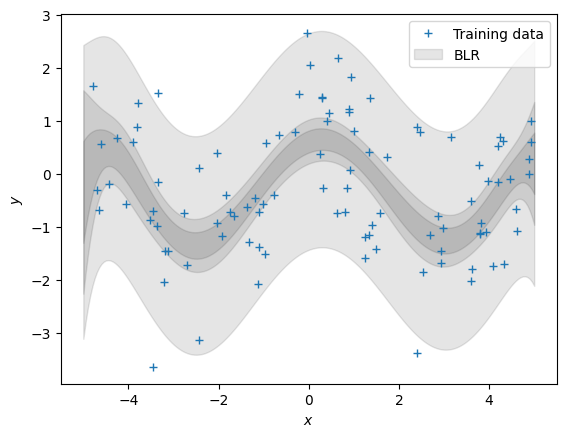

In [51]:
# plot the posterior
plt.figure()
plt.plot(X, y, "+")
# plt.plot(Xtest, m_mle_test)
# plt.plot(Xtest, m_map_test)
posterior_pred_mean = posterior_pred_mean.flatten()
var_blr = np.diag(posterior_pred_uncertainty_para)

conf_bound1 = np.sqrt(var_blr).flatten()
plt.fill_between(Xtest.flatten(), posterior_pred_mean + conf_bound1, posterior_pred_mean - conf_bound1, alpha = 0.1, color="k")

conf_bound2 = 2.0*np.sqrt(var_blr).flatten()
plt.fill_between(Xtest.flatten(), posterior_pred_mean + conf_bound2, posterior_pred_mean - conf_bound2, alpha = 0.1, color="k")

conf_bound3 = 2.0*np.sqrt(var_blr + sigma).flatten()
plt.fill_between(Xtest.flatten(), posterior_pred_mean + conf_bound3, posterior_pred_mean - conf_bound3, alpha = 0.1, color="k")

plt.legend(["Training data","BLR"])
plt.xlabel('$x$');
plt.ylabel('$y$');